# 딥러닝
## 0. 딥러닝 DNN 모델 프로세스
1. 라이브러리 임포트
2. 데이터 가져오기
3. 탐색적 데이터 분석
4. 데이터 전처리(타입변환, Null처리, 더미생성, 특성추출 등)
5. Train, Test 분할
6. 데이터 정규화
7. 모델 개발
8. 모델 성능 평가

## 1. 라이브러리 임포트

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. 데이터 로드

In [9]:
df = pd.read_csv('cust_data.csv')
df.head()

,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination,by_age,bill_rating,low,lowmid,mid,midhigh,high
0,C,F,28,0,N,N,2640.0000,792.00000,1584.0000,Y,25,low,1,0,0,0,0
1,E,F,24,1,N,N,16840.0000,2526.00000,6983.0000,N,20,high,0,0,0,0,1
2,F,F,32,1,N,N,15544.7334,2331.71001,6750.4666,N,30,high,0,0,0,0,1
3,D,M,18,1,N,N,4700.0000,0.00000,4502.0000,N,15,lowmid,0,1,0,0,0
4,C,F,78,1,N,N,1361.7999,1173.99990,0.0000,N,75,low,1,0,0,0,0


## 3. 데이터 분석 및 전처리

In [10]:
df = df.drop(columns=['low','lowmid','mid','midhigh','high'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8753 entries, 0 to 8752
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class        7827 non-null   object 
 1   sex          8753 non-null   object 
 2   age          8753 non-null   int64  
 3   service      8753 non-null   int64  
 4   stop         8753 non-null   object 
 5   npay         8753 non-null   object 
 6   avg_bill     8753 non-null   float64
 7   A_bill       8753 non-null   float64
 8   B_bill       8753 non-null   float64
 9   termination  8753 non-null   object 
 10  by_age       8753 non-null   int64  
 11  bill_rating  8753 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 820.7+ KB


<Axes: xlabel='termination'>

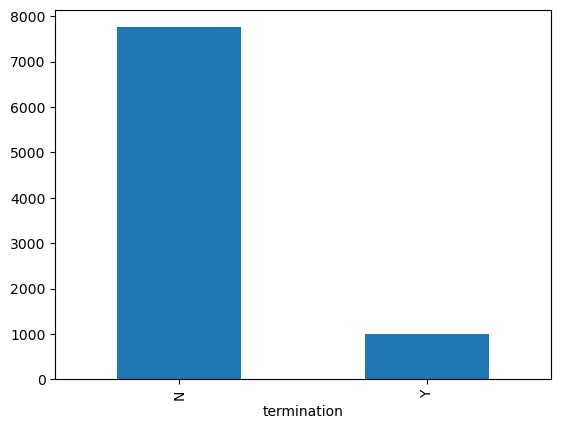

In [11]:
df['termination'].value_counts().plot(kind='bar') # 데이터 불균형;;

In [12]:
cal_cols = ['class', 'sex', 'stop', 'npay', 'termination', 'bill_rating']
df1 = pd.get_dummies(data=df,columns=cal_cols)
df1.shape
df1.columns

Index(['age', 'service', 'avg_bill', 'A_bill', 'B_bill', 'by_age', 'class_C',
       'class_D', 'class_E', 'class_F', 'class_G', 'class_H', 'sex_F', 'sex_M',
       'stop_N', 'stop_Y', 'npay_N', 'npay_Y', 'termination_N',
       'termination_Y', 'bill_rating_high', 'bill_rating_low',
       'bill_rating_lowmid', 'bill_rating_mid', 'bill_rating_midhigh'],
      dtype='object')

## 4. split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df1.drop(['termination_Y'],axis=1)
y = df1['termination_Y']
print(X.shape)
print(y.shape)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8753, 24)
(8753,)
(7002, 24)
(1751, 24)
(7002,)
(1751,)


## 5. 데이터 정규화/스케일링

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
!where python

e:\anaconda3\envs\aice\python.exe
C:\Users\User\AppData\Local\Programs\Python\Python312\python.exe
C:\Users\User\AppData\Local\Microsoft\WindowsApps\python.exe
E:\anaconda3\python.exe


In [17]:
import sys
print(sys.executable)

e:\anaconda3\envs\aice\python.exe


## 6. 딥러닝 심층신경망(DNN) 모델 구현

### 라이브러리 임포트

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

### 하이퍼파라미터 설정

In [19]:
batch_size = 16
epochs = 20

In [20]:
X_train.shape

(7002, 24)

### A. 이진분류 DNN모델 구성

In [21]:
model = Sequential()
model.add(Dense(4, activation = 'relu', input_shape = (24,)))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 100       
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


### 모델 구성(dropout 추가)

In [22]:
model = Sequential()
model.add(Dense(4,activation='relu',input_shape = (24,)))
model.add(Dropout(0.3))
model.add(Dense(2,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 100       
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dropout_1 (Dropout)         (None, 2)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


- 모델 컴파일 : 이진 분류 <br>
```
model.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])
```
- 모델 컴파일 : 다중 분류 모델(y 원핫인코딩 X)<br>
```
model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
```
- 모델 컴파일 : 다중 분류 모델(y 원핫인코딩 O)<br>
```
model.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy,
                metrics = ['accuracy'])
```
- 모델 컴파일 : 회귀 모델<br>
```
model.compile(optimizer = 'adam',
                loss = 'mse')
```

In [23]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [24]:
model.fit(X_train, y_train,
          validation_data = (X_test, y_test),
          epochs = 10,
          batch_size = 10)

Epoch 1/10
701/701 [==============================] - 2s 2ms/step - loss: 0.4831 - accuracy: 0.8827 - val_loss: 0.3329 - val_accuracy: 0.8846
Epoch 2/10
701/701 [==============================] - 1s 1ms/step - loss: 0.3417 - accuracy: 0.8866 - val_loss: 0.2143 - val_accuracy: 0.8846
Epoch 3/10
701/701 [==============================] - 1s 1ms/step - loss: 0.2908 - accuracy: 0.8866 - val_loss: 0.1842 - val_accuracy: 0.8846
Epoch 4/10
701/701 [==============================] - 1s 1ms/step - loss: 0.2789 - accuracy: 0.8866 - val_loss: 0.1748 - val_accuracy: 0.8846
Epoch 5/10
701/701 [==============================] - 1s 1ms/step - loss: 0.2621 - accuracy: 0.8866 - val_loss: 0.1643 - val_accuracy: 0.8846
Epoch 6/10
701/701 [==============================] - 1s 1ms/step - loss: 0.2482 - accuracy: 0.8959 - val_loss: 0.1600 - val_accuracy: 0.8846
Epoch 7/10
701/701 [==============================] - 1s 1ms/step - loss: 0.1984 - accuracy: 0.9350 - val_loss: 0.0435 - val_accuracy: 1.0000
Epoch 

### B. 다중 분류 DNN 구성

In [29]:
model = Sequential()
model.add(Dense(8,activation = 'relu',input_shape = (24,)))
model.add(Dropout(0.3))
model.add(Dense(4,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 200       
                                                                 
 dropout_4 (Dropout)         (None, 8)                 0         
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dropout_5 (Dropout)         (None, 4)                 0         
                                                                 
 dense_11 (Dense)            (None, 2)                 10        
                                                                 
Total params: 246
Trainable params: 246
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [32]:
history = model.fit(X_train,y_train,
                    validation_data = (X_test,y_test),
                    epochs = 20,
                    batch_size = 16)

Epoch 1/20
438/438 [==============================] - 1s 2ms/step - loss: 0.3984 - accuracy: 0.8573 - val_loss: 0.2020 - val_accuracy: 0.8846
Epoch 2/20
438/438 [==============================] - 1s 1ms/step - loss: 0.2138 - accuracy: 0.9113 - val_loss: 0.0855 - val_accuracy: 0.9714
Epoch 3/20
438/438 [==============================] - 1s 1ms/step - loss: 0.1340 - accuracy: 0.9434 - val_loss: 0.0247 - val_accuracy: 1.0000
Epoch 4/20
438/438 [==============================] - 1s 1ms/step - loss: 0.0982 - accuracy: 0.9544 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 5/20
438/438 [==============================] - 1s 1ms/step - loss: 0.0882 - accuracy: 0.9610 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 6/20
438/438 [==============================] - 1s 1ms/step - loss: 0.0682 - accuracy: 0.9760 - val_loss: 5.9137e-04 - val_accuracy: 1.0000
Epoch 7/20
438/438 [==============================] - 1s 1ms/step - loss: 0.0552 - accuracy: 0.9807 - val_loss: 1.2000e-04 - val_accuracy: 1.000

### Callback : 조기종료, 모델 저장

In [33]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [35]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min',
                           verbose = 1, patience = 5)

In [36]:
check_point = ModelCheckpoint('best_model.keras',verbose=1,
                              monitor = 'val_loss',mode=  'min',
                              save_best_only=True)

In [37]:
history = model.fit(X_train,y_train,
                    epochs = 50, batch_size = 16,
                    validation_data = (X_test,y_test),
                    verbose = 1,
                    callbacks = [early_stop,check_point])


Epoch 1/50
397/438 [==========================>...] - ETA: 0s - loss: 0.0442 - accuracy: 0.9841
Epoch 1: val_loss improved from inf to 0.00000, saving model to best_model.keras
438/438 [==============================] - 1s 2ms/step - loss: 0.0444 - accuracy: 0.9841 - val_loss: 3.6083e-09 - val_accuracy: 1.0000
Epoch 2/50
394/438 [=========================>....] - ETA: 0s - loss: 0.0368 - accuracy: 0.9881
Epoch 2: val_loss improved from 0.00000 to 0.00000, saving model to best_model.keras
438/438 [==============================] - 1s 1ms/step - loss: 0.0363 - accuracy: 0.9883 - val_loss: 2.1786e-09 - val_accuracy: 1.0000
Epoch 3/50
435/438 [============================>.] - ETA: 0s - loss: 0.0378 - accuracy: 0.9868
Epoch 3: val_loss improved from 0.00000 to 0.00000, saving model to best_model.keras
438/438 [==============================] - 1s 1ms/step - loss: 0.0376 - accuracy: 0.9869 - val_loss: 4.0848e-10 - val_accuracy: 1.0000
Epoch 4/50
426/438 [============================>.] - ET

### 모델 성능 평가

In [38]:
model.load_weights('best_model.keras')

In [39]:
model.evaluate(X_test,y_test)

55/55 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

#### 성능 시각화

In [40]:
losses = pd.DataFrame(history.history)

In [41]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.044370,0.984147,3.608276e-09,1.0
1,0.036302,0.988289,2.178582e-09,1.0
2,0.037594,0.986861,4.084841e-10,1.0
3,0.037404,0.987718,2.042421e-10,1.0
4,0.039944,0.985861,6.808069e-11,1.0


<Axes: >

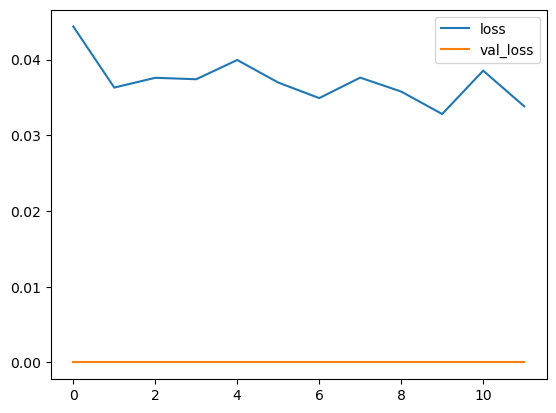

In [42]:
losses[['loss','val_loss']].plot()

<Axes: >

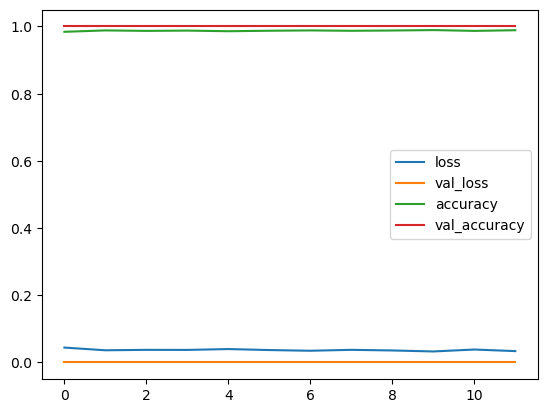

In [43]:
losses[['loss','val_loss','accuracy','val_accuracy']].plot()

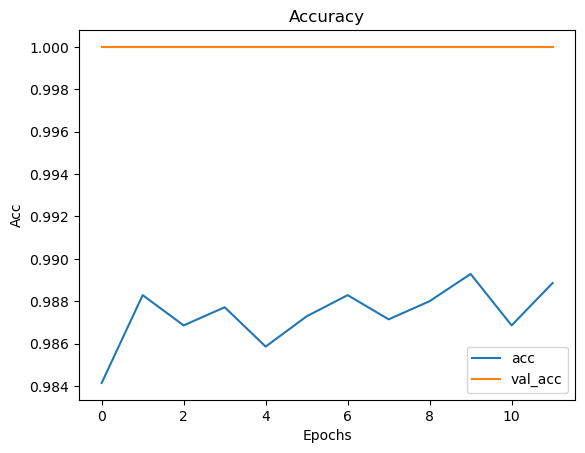

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()